In [877]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

In [879]:
customer_info = pd.read_csv('DataSource/Bank_Churn_Messy.xlsx - Customer_Info.csv')
customer_data_dict = pd.read_csv('DataSource/Bank_Churn_Data_Dictionary.csv')
Account_info = pd.read_csv('DataSource/Bank_Churn_Messy.xlsx - Account_Info.csv')

In [880]:
# Data profiling
# Goal: The  goal is to analyze the dataset to gain insights into customer behavior, financial standing, and engagement patterns.


customer_info.head(31)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
5,15574012,Chu,645,Spain,Male,44.0,8,€149756.71
6,15592531,Bartlett,822,France,Male,50.0,7,€10062.8
7,15656148,Obinna,376,Germany,Female,29.0,4,€119346.88
8,15792365,He,501,French,Male,44.0,4,€74940.5
9,15592389,H?,684,France,Male,27.0,2,€71725.73


In [881]:
customer_info.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary'],
      dtype='object')

In [882]:
customer_data_dict.info

<bound method DataFrame.info of               Field                                        Description
0        CustomerId              A unique identifier for each customer
1           Surname                           The customer's last name
2       CreditScore  A numerical value representing the customer's ...
3         Geography  The country where the customer resides (France...
4            Gender             The customer's gender (Male or Female)
5               Age                                 The customer's age
6            Tenure  The number of years the customer has been with...
7           Balance                     The customer's account balance
8     NumOfProducts  The number of bank products the customer uses ...
9         HasCrCard  Whether the customer has a credit card (1 = ye...
10   IsActiveMember  Whether the customer is an active member (1 = ...
11  EstimatedSalary               The estimated salary of the customer
12           Exited  Whether the customer has

In [883]:
Account_info.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


In [884]:
Account_info.head(10)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0
5,15737888,€125510.82,1,Yes,2,Yes,0
6,15574012,€113755.78,2,No,8,No,1
7,15592531,€0.0,2,Yes,7,Yes,0
8,15656148,€115046.74,4,No,4,No,1
9,15792365,€142051.07,2,Yes,4,Yes,0


In [885]:
Account_info.shape

(10002, 7)

In [886]:
customer_info.shape

(10001, 8)

In [887]:
# duplicate informations

customer_info.duplicated().sum()

1

In [888]:
Account_info.duplicated().sum()

2

In [889]:
#Remove duplicates

customer_info.drop_duplicates(inplace=True)
Account_info.drop_duplicates(inplace=True)

In [890]:
customer_info.duplicated().sum()

0

In [891]:
Account_info.duplicated().sum()

0

In [892]:
customer_info.shape

(10000, 8)

In [893]:
Account_info.shape

(10000, 7)

In [894]:
#rename columns

Account_info.rename(columns = {
    'CustomerId' : 'Customer Id',
    'NumOfProducts' : 'Number of Products',
    'HasCrCard': 'Credit card holder',
    'IsActiveMember' : 'Active Member'
}, inplace=True)

In [895]:
Account_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer Id         10000 non-null  int64 
 1   Balance             10000 non-null  object
 2   Number of Products  10000 non-null  int64 
 3   Credit card holder  10000 non-null  object
 4   Tenure              10000 non-null  int64 
 5   Active Member       10000 non-null  object
 6   Exited              10000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 625.0+ KB


In [801]:
customer_info.rename(columns = {
    'CustomerId' : 'Customer Id',
    'CreditScore' : 'Credit Score',
    'EstimatedSalary' : 'Estimated Salary'
}, inplace=True)

In [896]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 703.1+ KB


In [897]:
customer_info['Age'] = customer_info['Age'].round(0)

In [898]:
customer_info.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
dtype: int64

In [899]:
Account_info.isnull().sum()

Customer Id           0
Balance               0
Number of Products    0
Credit card holder    0
Tenure                0
Active Member         0
Exited                0
dtype: int64

In [900]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 703.1+ KB


In [737]:
customer_info['Age'] = customer_info['Age'].astype(int64)
customer_info.head()

NameError: name 'int64' is not defined

In [901]:
customer_info = customer_info.dropna(subset=['Surname', 'Age'])

In [902]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   float64
 6   Tenure           9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 702.9+ KB


In [903]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   float64
 6   Tenure           9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 702.9+ KB


In [904]:
customer_info['Age'] = customer_info['Age'].astype(np.int64)

customer_info.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42,2,€101348.88
1,15647311,Hill,608,Spain,Female,41,1,€112542.58
2,15619304,Onio,502,French,Female,42,8,€113931.57
3,15701354,Boni,699,FRA,Female,39,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1
5,15574012,Chu,645,Spain,Male,44,8,€149756.71
6,15592531,Bartlett,822,France,Male,50,7,€10062.8
7,15656148,Obinna,376,Germany,Female,29,4,€119346.88
8,15792365,He,501,French,Male,44,4,€74940.5
9,15592389,H?,684,France,Male,27,2,€71725.73


In [905]:
customer_info.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42,2,€101348.88
1,15647311,Hill,608,Spain,Female,41,1,€112542.58
2,15619304,Onio,502,French,Female,42,8,€113931.57
3,15701354,Boni,699,FRA,Female,39,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1


In [906]:
Account_info.head(5)

,Customer Id,Balance,Number of Products,Credit card holder,Tenure,Active Member,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0
5,15737888,€125510.82,1,Yes,2,Yes,0


In [907]:
customer_info.rename(columns = {
    'CustomerId' : 'Customer Id'
}, inplace=True)

In [927]:
comb_df = pd.merge(customer_info, Account_info, on=['Customer Id', 'Tenure'], how='inner')

In [928]:
comb_df.head(10)

,Customer Id,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,Number of Products,Credit card holder,Active Member,Exited
0,15634602,Hargrave,619,FRA,Female,42,2,€101348.88,€0.0,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,€83807.86,1,Yes,Yes,0
2,15619304,Onio,502,French,Female,42,8,€113931.57,€159660.8,3,No,No,1
3,15701354,Boni,699,FRA,Female,39,1,€93826.63,€0.0,2,No,No,0
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,€125510.82,1,Yes,Yes,0
5,15574012,Chu,645,Spain,Male,44,8,€149756.71,€113755.78,2,No,No,1
6,15592531,Bartlett,822,France,Male,50,7,€10062.8,€0.0,2,Yes,Yes,0
7,15656148,Obinna,376,Germany,Female,29,4,€119346.88,€115046.74,4,No,No,1
8,15792365,He,501,French,Male,44,4,€74940.5,€142051.07,2,Yes,Yes,0
9,15592389,H?,684,France,Male,27,2,€71725.73,€134603.88,1,Yes,Yes,0


In [929]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer Id         9997 non-null   int64 
 1   Surname             9997 non-null   object
 2   CreditScore         9997 non-null   int64 
 3   Geography           9997 non-null   object
 4   Gender              9997 non-null   object
 5   Age                 9997 non-null   int64 
 6   Tenure              9997 non-null   int64 
 7   EstimatedSalary     9997 non-null   object
 8   Balance             9997 non-null   object
 9   Number of Products  9997 non-null   int64 
 10  Credit card holder  9997 non-null   object
 11  Active Member       9997 non-null   object
 12  Exited              9997 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 1015.4+ KB


In [930]:
comb_df.rename(columns = {
    'Geography' : 'Country'
}, inplace=True)

In [931]:
comb_df['Country'] = comb_df['Country'].replace(
    {'FRA': 'France',
    'French' : 'France'
})

In [1228]:
comb_df.to_csv('Bank Customer Analysis Cleaned.csv')

In [933]:
comb_df.head(5)

,Customer Id,Surname,CreditScore,Country,Gender,Age,Tenure,EstimatedSalary,Balance,Number of Products,Credit card holder,Active Member,Exited
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,€0.0,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,€83807.86,1,Yes,Yes,0
2,15619304,Onio,502,France,Female,42,8,€113931.57,€159660.8,3,No,No,1
3,15701354,Boni,699,France,Female,39,1,€93826.63,€0.0,2,No,No,0
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,€125510.82,1,Yes,Yes,0


In [934]:
comb_df['Surname'] = comb_df['Surname'].replace(
    {'H?': 'He',
    'L?' : 'Lu',
     'K?' : 'Ku',
     'Y?an' : 'Yuan'
})

In [935]:
comb_df['Surname'] = comb_df['Surname'].replace(
    {'Hs?' : 'Hou'
    })

In [936]:
comb_df['Surname'] = comb_df['Surname'].replace(
    {'Y?' : 'Yu'
})

In [939]:
comb_df.head(120)

,Customer Id,Surname,CreditScore,Country,Gender,Age,Tenure,EstimatedSalary,Balance,Number of Products,Credit card holder,Active Member,Exited,Customer Status
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,€0.0,1,Yes,Yes,1,Active
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,€83807.86,1,Yes,Yes,0,Active
2,15619304,Onio,502,France,Female,42,8,€113931.57,€159660.8,3,No,No,1,Inactive
3,15701354,Boni,699,France,Female,39,1,€93826.63,€0.0,2,No,No,0,Inactive
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,€125510.82,1,Yes,Yes,0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,15705512,Welch,668,Germany,Female,37,6,€115638.29,€167864.4,1,No,No,0,Inactive
116,15698028,Duncan,506,France,Female,41,1,€31766.3,€0.0,2,No,No,0,Inactive
117,15661670,Chidozie,524,Germany,Female,31,8,€199725.39,€107818.63,1,No,No,1,Inactive
118,15600781,Wu,699,Germany,Male,34,4,€120834.48,€185173.81,2,No,No,0,Inactive


#### Data Prepration

In [938]:
comb_df['Customer Status'] = np.where(comb_df['Active Member'] == 'Yes', 'Active', 'Inactive')

In [940]:
comb_df.describe()

,Customer Id,CreditScore,Age,Tenure,Number of Products,Exited
count,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,1.569094e+07,650.545364,38.922077,5.013204,1.530359,0.203761
std,7.193443e+04,96.657932,10.489072,2.892364,0.581669,0.402814
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,1.000000,0.000000
50%,1.569073e+07,652.000000,37.000000,5.000000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.000000


In [757]:
#helper functions

plt.figure(figsize=(20, 10)).patch.set_facecolor('none')

def generate_bar_plot(x , y, xlabel, ylabel):
    plt.bar(x,y,color='grey', edgecolor='black')
    plt.title(f'plot of {ylabel} against {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


<Figure size 2000x1000 with 0 Axes>

In [941]:
comb_df['Churned'] = comb_df['Exited'].map({1: 'Yes', 0: 'No'})

In [947]:
comb_df.head(5)

,Customer Id,Surname,CreditScore,Country,Gender,Age,Tenure,EstimatedSalary,Balance,Number of Products,Credit card holder,Customer Status,Churned
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,€0.0,1,Yes,Active,Yes
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,€83807.86,1,Yes,Active,No
2,15619304,Onio,502,France,Female,42,8,€113931.57,€159660.8,3,No,Inactive,Yes
3,15701354,Boni,699,France,Female,39,1,€93826.63,€0.0,2,No,Inactive,No
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,€125510.82,1,Yes,Active,No


In [943]:
comb_df.drop('Exited', axis=1, inplace=True)

In [945]:
comb_df.drop('Active Member', axis=1, inplace=True)

In [948]:
def categorize_age(value):
    if value > 55:
        return 'Senior Citizen'
    elif value >34:
        return 'Middle Age'
    elif value > 25:
        return 'Young Adult'
    elif value > 17:
        return 'Youth'

comb_df['Age Distribution'] = comb_df['Age'].apply(categorize_age)

In [954]:
comb_df.head(10)

,Customer Id,Surname,CreditScore,Country,Gender,Age,Tenure,Estimated Salary,Balance,Number of Products,Credit card holder,Customer Status,Churned,Age Distribution
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,0.00,1,Yes,Active,Yes,Middle Age
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,83807.86,1,Yes,Active,No,Middle Age
2,15619304,Onio,502,France,Female,42,8,€113931.57,159660.80,3,No,Inactive,Yes,Middle Age
3,15701354,Boni,699,France,Female,39,1,€93826.63,0.00,2,No,Inactive,No,Middle Age
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,125510.82,1,Yes,Active,No,Middle Age
5,15574012,Chu,645,Spain,Male,44,8,€149756.71,113755.78,2,No,Inactive,Yes,Middle Age
6,15592531,Bartlett,822,France,Male,50,7,€10062.8,0.00,2,Yes,Active,No,Middle Age
7,15656148,Obinna,376,Germany,Female,29,4,€119346.88,115046.74,4,No,Inactive,Yes,Young Adult
8,15792365,He,501,France,Male,44,4,€74940.5,142051.07,2,Yes,Active,No,Middle Age
9,15592389,He,684,France,Male,27,2,€71725.73,134603.88,1,Yes,Active,No,Young Adult


In [953]:
comb_df.rename(columns = {
    'EstimatedSalary' : 'Estimated Salary'
}, inplace=True)

In [970]:
comb_df.rename(columns = {
    'CreditScore' : 'Credit Score'
}, inplace=True)

In [972]:
comb_df['Balance'] = pd.to_numeric(comb_df['Balance'], errors='coerce')

bins = [0, 50000, 100000, 150000, 200000, 250000, float('inf')]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k+']

comb_df['Balance Range'] = pd.cut(comb_df['Balance'], bins=bins, labels=labels, include_lowest=True)

In [975]:
comb_df.head()

,Customer Id,Surname,Credit Score,Country,Gender,Age,Tenure,Estimated Salary,Balance,Number of Products,Credit card holder,Customer Status,Churned,Age Distribution,Balance Range
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,0.00,1,Yes,Active,Yes,Middle Age,<50k
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,83807.86,1,Yes,Active,No,Middle Age,50k-100k
2,15619304,Onio,502,France,Female,42,8,€113931.57,159660.80,3,No,Inactive,Yes,Middle Age,150k-200k
3,15701354,Boni,699,France,Female,39,1,€93826.63,0.00,2,No,Inactive,No,Middle Age,<50k
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,125510.82,1,Yes,Active,No,Middle Age,100k-150k


### Analysis

### What is the age distribution of customers who have churned and those retained?

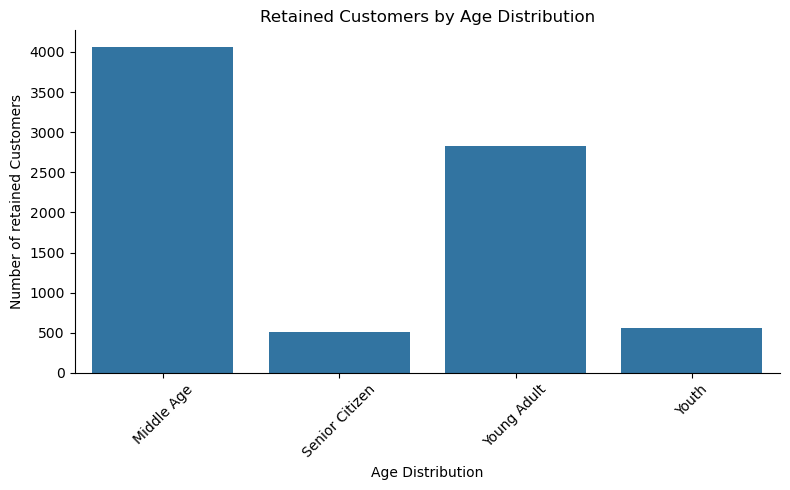

In [1174]:
# Age distribution by retained Status 

retained_customers = comb_df[comb_df['Churned'] == 'No']

age_distribution_counts = retained_customers['Age Distribution'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sb.barplot(x=age_distribution_counts.index, y=age_distribution_counts.values)

plt.title('Retained Customers by Age Distribution')
plt.xlabel('Age Distribution')
plt.ylabel('Number of retained Customers')
plt.xticks(rotation=45)
plt.tight_layout()
sb.despine()
plt.show()

### Do older customers tend to remain more loyal than younger ones?

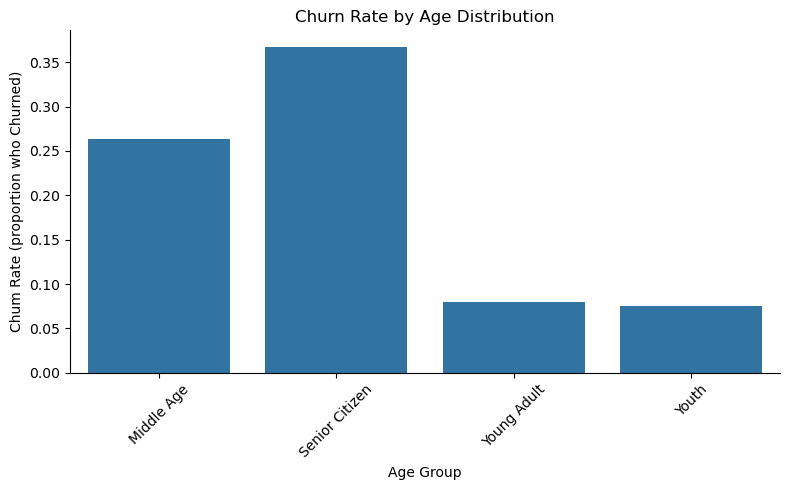

In [1173]:
# Do older customers tend to remain more loyal than younger ones?

churn_rate_by_age = comb_df.groupby('Age Distribution')['Churned'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(8, 5))
sb.barplot(x=churn_rate_by_age.index, y=churn_rate_by_age['Yes'])

plt.title('Churn Rate by Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Chum Rate (proportion who Churned)')
plt.xticks(rotation=45)
plt.tight_layout()
sb.despine()
plt.show()

### Which country has the highest Chun Rate?

Country with Highest Churn Rate:
Churned        No       Yes
Country                    
Germany  0.675439  0.324561


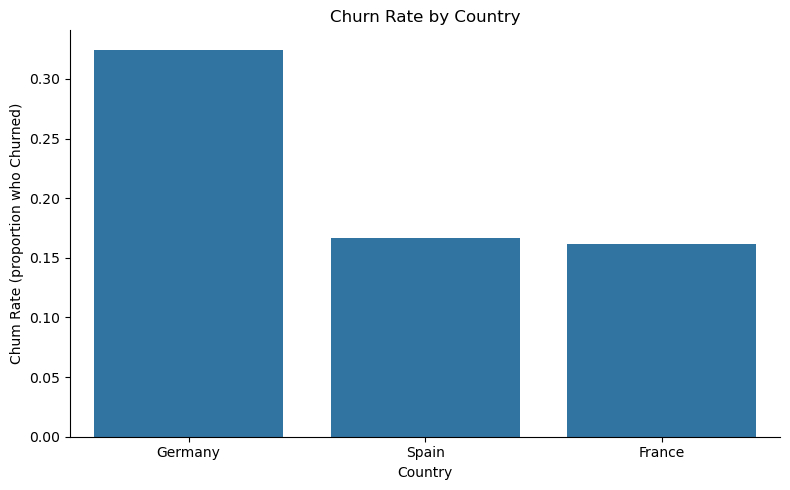

In [1172]:
# Churn Rate by Country

country_churn_rate = comb_df.groupby('Country')['Churned'].value_counts(normalize=True).unstack().fillna(0)

country_churn_rate_sorted = country_churn_rate.sort_values(by='Yes', ascending=False)
print ('Country with Highest Churn Rate:')
print(country_churn_rate_sorted.head(1))

plt.figure(figsize=(8, 5))
sb.barplot(x=country_churn_rate_sorted.index, y=country_churn_rate_sorted['Yes'])

plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Chum Rate (proportion who Churned)')
plt.tight_layout()
sb.despine()
plt.show()

Is there a significant difference in churn rate between male and female customers?

Churn Rate by Gender:
Churned        No       Yes
Gender                     
Female   0.749174  0.250826
Male     0.835411  0.164589
The percentage retention rate for both male and Female is 83.5411% and 74.9174% respectively


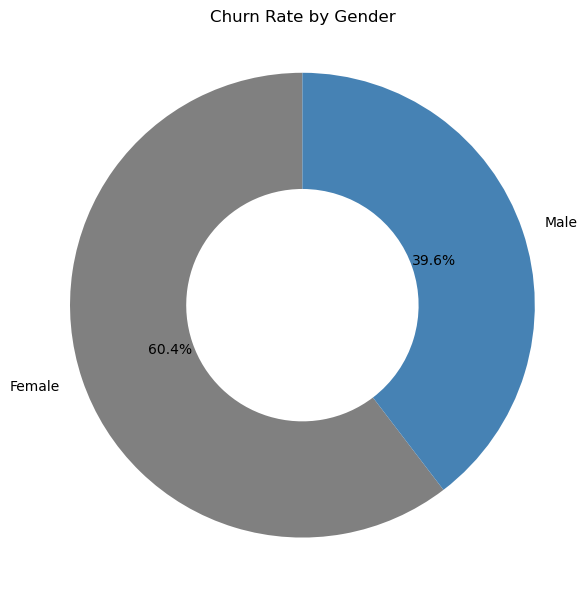

In [1167]:
# Churn Rate by Gender

gender_churn_rate = comb_df.groupby('Gender')['Churned'].value_counts(normalize=True).unstack().fillna(0)

print ('Churn Rate by Gender:')
print(gender_churn_rate)

Female_retained = 0.749174 * 100
Male_retained = 0.835411 * 100

print(f'The percentage retention rate for both male and Female is {Male_retained}% and {Female_retained}% respectively')

labels = gender_churn_rate.index.tolist()
sizes = gender_churn_rate['Yes'].values
colors = ['gray', 'steelblue']
colors=['gray', 'steelblue']
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    wedgeprops={'width': 0.5}
)

plt.title('Churn Rate by Gender')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [1123]:
# gender churn rate

gender_churn_rate = comb_df.groupby('Gender')['Churned'].value_counts(normalize=True).unstack().fillna(0)
print(gender_churn_rate)

Female_churn = 0.250826 * 100
Male_churn = 0.164589 * 100

print(f'The percentage churn rate for both male and Female is {Male_churn}% and {Female_churn}% respectively')


Churned        No       Yes
Gender                     
Female   0.749174  0.250826
Male     0.835411  0.164589
The percentage churn rate for both male and Female is 16.4589% and 25.0826% respectively


Retention Rate by Gender:
Churned        No       Yes
Gender                     
Female   0.749174  0.250826
Male     0.835411  0.164589
The percentage retention rate for both male and Female is 83.5411% and 74.9174% respectively


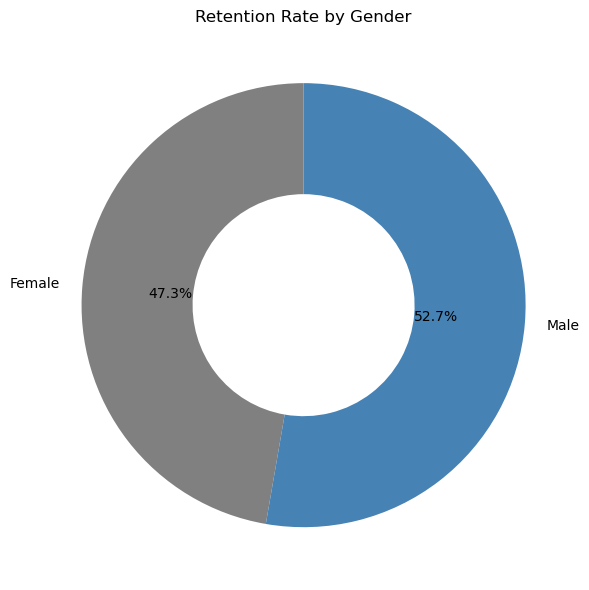

In [1162]:
# Retention Rate by Gender

gender_retention_rate = comb_df.groupby('Gender')['Churned'].value_counts(normalize=True).unstack().fillna(0)

print ('Retention Rate by Gender:')
print(gender_retention_rate)

Female_retained = 0.749174 * 100
Male_retained = 0.835411 * 100

print(f'The percentage retention rate for both male and Female is {Male_retained}% and {Female_retained}% respectively')

labels = gender_retention_rate.index.tolist()
sizes = gender_retention_rate['No'].values
colors = ['gray', 'steelblue']
colors=['gray', 'steelblue']
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    wedgeprops={'width': 0.5}
)

plt.title('Retention Rate by Gender')
plt.axis('equal')
plt.tight_layout()
plt.show()

## How does credit score relate to customer churn?

  Churned  Credit Score
0      No    651.874497
1     Yes    645.351497


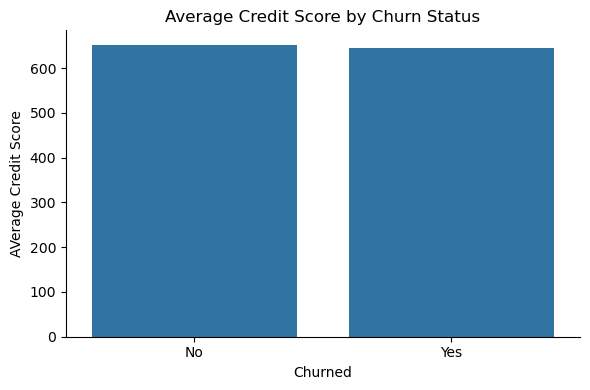

In [1171]:
# How does credit score relate to customer churn?

credit_stats = comb_df.groupby('Churned')['Credit Score'].mean().reset_index()
print(credit_stats)

plt.figure(figsize=(6,4))
sb.barplot(x='Churned', y='Credit Score', data=credit_stats)
plt.title('Average Credit Score by Churn Status')
plt.xlabel('Churned')
plt.ylabel('AVerage Credit Score')
sb.despine()
plt.tight_layout()
plt.show()

### Does owning more bank products correlate with reduced churn?

Churned                   No       Yes
Number of Products                    
1                   0.722692  0.277308
2                   0.924183  0.075817
3                   0.172932  0.827068
4                   0.000000  1.000000


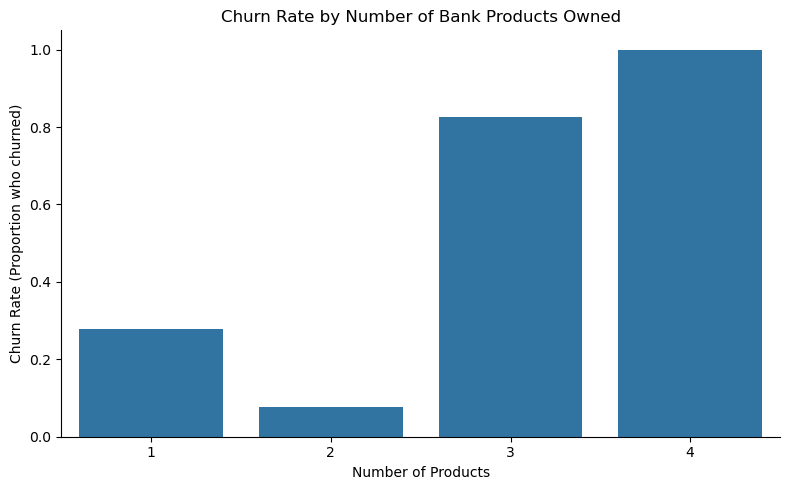

In [1170]:
# Churn Rate by Number of Bank Products Owned

product_churn_rate = comb_df.groupby('Number of Products')['Churned'].value_counts(normalize=True).unstack().fillna(0)

print(product_churn_rate)

#visualization
plt.figure(figsize=(8,5))
sb.barplot(x=product_churn_rate.index, y=product_churn_rate['Yes'])
plt.title('Churn Rate by Number of Bank Products Owned')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate (Proportion who churned)')
sb.despine()
plt.tight_layout()
plt.show()

In [777]:
#Total Customers

Total_Customers

print(f'The Total Number of Customer is {Total_Customers}')

The Total Number of Customer is 9997


In [980]:
comb_df['Balance'] = comb_df['Balance'].replace(r'[€,]', '', regex=True)
comb_df['Balance'] = pd.to_numeric(comb_df['Balance'], errors='coerce')

comb_df.describe()

,Customer Id,Credit Score,Age,Tenure,Balance,Number of Products
count,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,1.569094e+07,650.545364,38.922077,5.013204,76482.679807,1.530359
std,7.193443e+04,96.657932,10.489072,2.892364,62397.174721,0.581669
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000
50%,1.569073e+07,652.000000,37.000000,5.000000,97188.620000,1.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127642.440000,2.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000


Average Balance by Churn Status:
   Churned       Balance
0      No  72739.856206
1     Yes  91108.539337


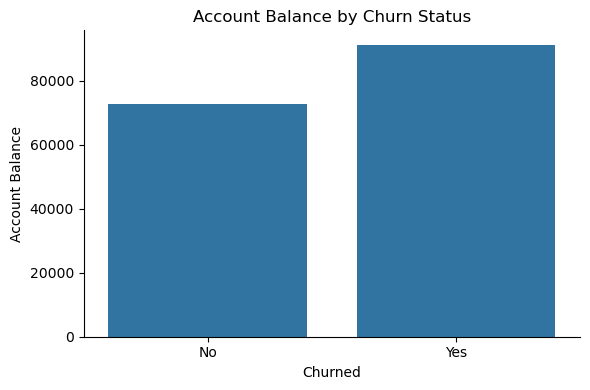

In [1168]:
# Do customers with lower average balances tend to leave more often?

balance_by_churn = comb_df.groupby('Churned')['Balance'].mean().reset_index()
print('Average Balance by Churn Status:\n', balance_by_churn)

#visualization
plt.figure(figsize=(6,4))
sb.barplot(x='Churned', y='Balance', data=balance_by_churn)
plt.title('Account Balance by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Account Balance')
sb.despine()
plt.tight_layout()
plt.show()

In [982]:
comb_df.head(10)

,Customer Id,Surname,Credit Score,Country,Gender,Age,Tenure,Estimated Salary,Balance,Number of Products,Credit card holder,Customer Status,Churned,Age Distribution,Balance Range
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,0.00,1,Yes,Active,Yes,Middle Age,<50k
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,83807.86,1,Yes,Active,No,Middle Age,50k-100k
2,15619304,Onio,502,France,Female,42,8,€113931.57,159660.80,3,No,Inactive,Yes,Middle Age,150k-200k
3,15701354,Boni,699,France,Female,39,1,€93826.63,0.00,2,No,Inactive,No,Middle Age,<50k
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,125510.82,1,Yes,Active,No,Middle Age,100k-150k
5,15574012,Chu,645,Spain,Male,44,8,€149756.71,113755.78,2,No,Inactive,Yes,Middle Age,100k-150k
6,15592531,Bartlett,822,France,Male,50,7,€10062.8,0.00,2,Yes,Active,No,Middle Age,<50k
7,15656148,Obinna,376,Germany,Female,29,4,€119346.88,115046.74,4,No,Inactive,Yes,Young Adult,100k-150k
8,15792365,He,501,France,Male,44,4,€74940.5,142051.07,2,Yes,Active,No,Middle Age,100k-150k
9,15592389,He,684,France,Male,27,2,€71725.73,134603.88,1,Yes,Active,No,Young Adult,100k-150k


C:\Users\hp\AppData\Local\Temp\ipykernel_20876\234146244.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_balance = comb_df.groupby(['Balance Range', 'Churned']).size().unstack()


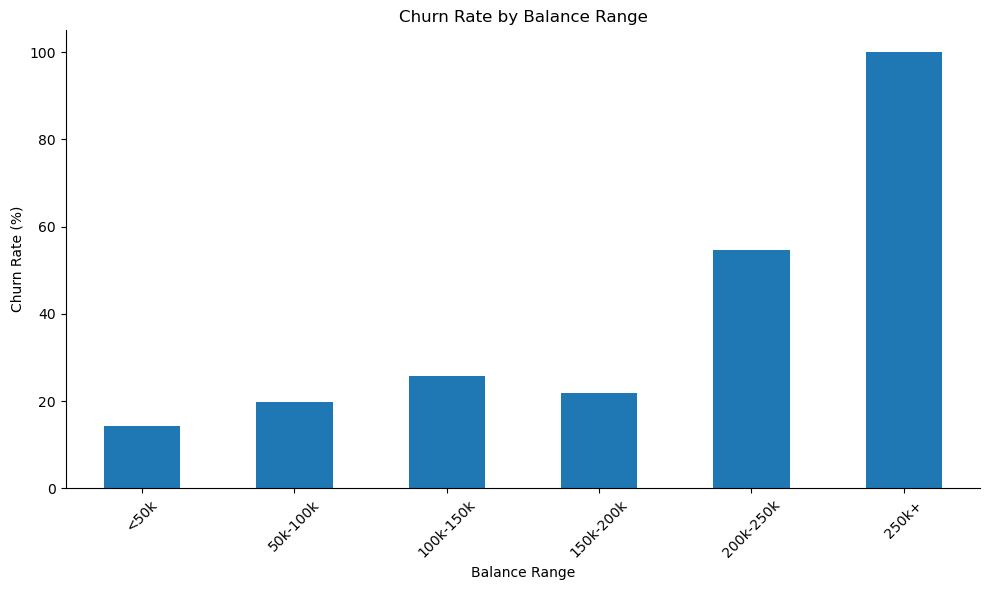

In [1136]:
# Is there a balance threshold above which customers are more likely to churn?

churn_by_balance = comb_df.groupby(['Balance Range', 'Churned']).size().unstack()
churn_rate = (churn_by_balance['Yes'] / churn_by_balance.sum(axis=1)) * 100

churn_rate.plot(kind='bar' , figsize=(10,6))
plt.title('Churn Rate by Balance Range')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Balance Range')
plt.xticks(rotation=45)
sb.despine()
plt.tight_layout()
plt.show()


In [984]:
comb_df.head()

,Customer Id,Surname,Credit Score,Country,Gender,Age,Tenure,Estimated Salary,Balance,Number of Products,Credit card holder,Customer Status,Churned,Age Distribution,Balance Range
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,0.00,1,Yes,Active,Yes,Middle Age,<50k
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,83807.86,1,Yes,Active,No,Middle Age,50k-100k
2,15619304,Onio,502,France,Female,42,8,€113931.57,159660.80,3,No,Inactive,Yes,Middle Age,150k-200k
3,15701354,Boni,699,France,Female,39,1,€93826.63,0.00,2,No,Inactive,No,Middle Age,<50k
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,125510.82,1,Yes,Active,No,Middle Age,100k-150k


In [1195]:

avg_products = comb_df.groupby('Churned')['Number of Products'].mean()
print(avg_products)

Churned
No     1.544472
Yes    1.475209
Name: Number of Products, dtype: float64


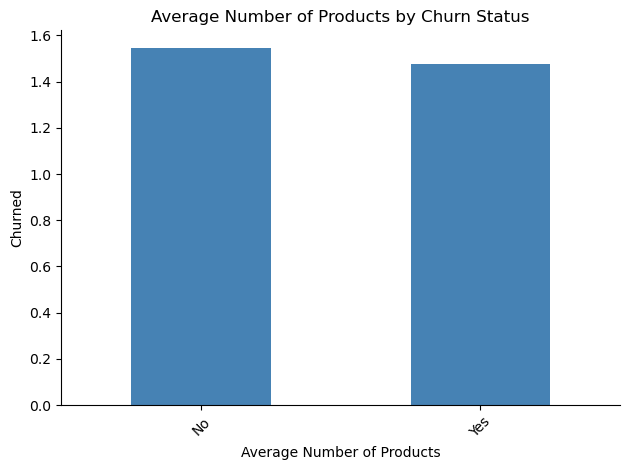

In [1197]:
avg_products.plot(kind='bar' , color=['steelblue'])
plt.title('Average Number of Products by Churn Status')
plt.ylabel('Churned')
plt.xlabel('Average Number of Products')
plt.xticks(rotation=45)
sb.despine()
plt.tight_layout()
plt.show()


Churned        No       Yes  Churn Rate (%)
Tenure                                     
0        0.769976  0.230024       23.002421
1        0.775845  0.224155       22.415459
2        0.808023  0.191977       19.197708
3        0.788690  0.211310       21.130952
4        0.794742  0.205258       20.525784
5        0.793478  0.206522       20.652174
6        0.797101  0.202899       20.289855
7        0.827821  0.172179       17.217899
8        0.807805  0.192195       19.219512
9        0.783537  0.216463       21.646341
10       0.793878  0.206122       20.612245


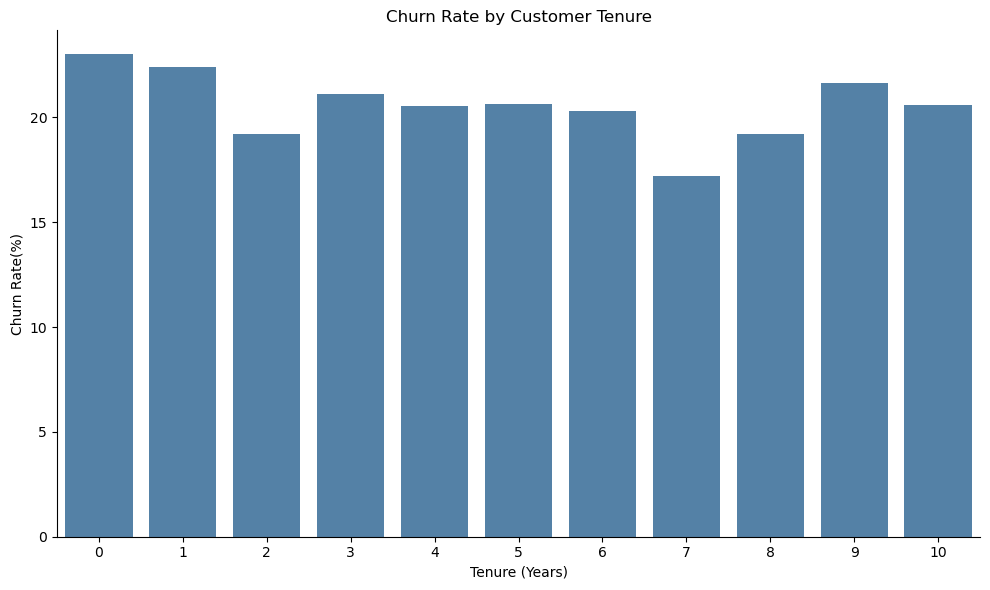

In [1190]:
# How does customer tenure impact churn—are newer or long-term customers more likely to exit?"

tenure_churn_rate = comb_df.groupby('Tenure')['Churned'].value_counts(normalize=True).unstack().fillna(0)
tenure_churn_rate['Churn Rate (%)'] = tenure_churn_rate['Yes'] * 100
print(tenure_churn_rate)

plt.figure(figsize=(10,6))
sb.barplot(x=tenure_churn_rate.index, y=tenure_churn_rate['Churn Rate (%)'], color='steelblue')

plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate(%)')
plt.xticks(np.arange(min(tenure_churn_rate.index), max(tenure_churn_rate.index) + 1, 1))
sb.despine()
plt.tight_layout()
plt.show()

In [1015]:
comb_df.head(3)

,Customer Id,Surname,Credit Score,Country,Gender,Age,Tenure,Estimated Salary,Balance,Number of Products,Credit card holder,Customer Status,Churned,Age Distribution,Balance Range
0,15634602,Hargrave,619,France,Female,42,2,€101348.88,0.00,1,Yes,Active,Yes,Middle Age,<50k
1,15647311,Hill,608,Spain,Female,41,1,€112542.58,83807.86,1,Yes,Active,No,Middle Age,50k-100k
2,15619304,Onio,502,France,Female,42,8,€113931.57,159660.80,3,No,Inactive,Yes,Middle Age,150k-200k
3,15701354,Boni,699,France,Female,39,1,€93826.63,0.00,2,No,Inactive,No,Middle Age,<50k
4,15737888,Mitchell,850,Spain,Female,43,2,€79084.1,125510.82,1,Yes,Active,No,Middle Age,100k-150k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15738721,Graham,773,Spain,Male,41,9,€64595.25,102827.44,1,Yes,Active,No,Middle Age,100k-150k
96,15693683,Yuille,814,Germany,Male,29,8,€197276.13,97086.40,2,Yes,Active,No,Young Adult,50k-100k
97,15604348,Allard,710,Spain,Male,22,8,€99645.04,0.00,2,No,Inactive,No,Youth,<50k
98,15633059,Fanucci,413,France,Male,34,9,€6534.18,0.00,2,No,Inactive,No,Young Adult,<50k


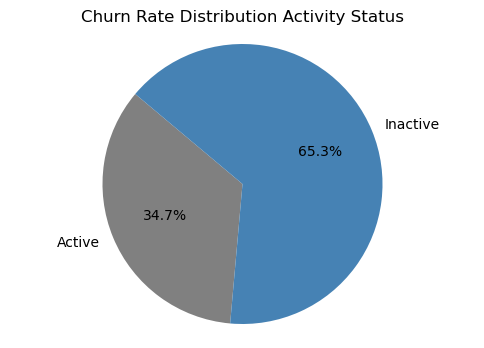

In [1191]:
# Are active members significantly less likely to churn than inactive ones?

activity_churn = comb_df.groupby('Customer Status')['Churned'].value_counts(normalize=True).unstack().fillna(0)
activity_churn['Churn Rate (%)'] = activity_churn['Yes'] * 100

activity_churn = activity_churn.reindex(['Active', 'Inactive'])

churn_rates = activity_churn['Churn Rate (%)'].values
labels = ['Active', 'Inactive']


plt.figure(figsize=(6, 4))
plt.pie(churn_rates, labels=labels, autopct='%1.1f%%', colors=['gray', 'steelblue'], startangle=140)
plt.title('Churn Rate Distribution Activity Status')
plt.axis('equal')
sb.despine()
plt.show()

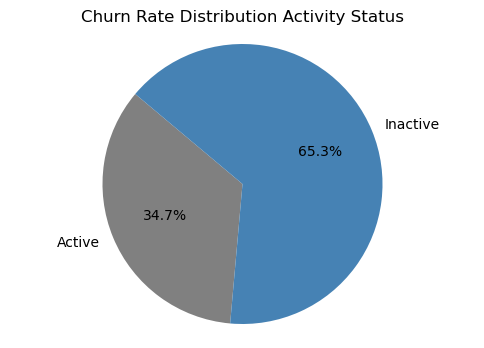

In [1198]:
# Are active members significantly less likely to churn than inactive ones?

activity_churn = comb_df.groupby('Customer Status')['Churned'].value_counts(normalize=True).unstack().fillna(0)
activity_churn['Churn Rate (%)'] = activity_churn['Yes'] * 100

activity_churn = activity_churn.reindex(['Active', 'Inactive'])

churn_rates = activity_churn['Churn Rate (%)'].values
labels = ['Active', 'Inactive']


plt.figure(figsize=(6, 4))
plt.pie(churn_rates, labels=labels, autopct='%1.1f%%', colors=['gray', 'steelblue'], startangle=140)
plt.title('Churn Rate Distribution Activity Status')
plt.axis('equal')
sb.despine()
plt.show()

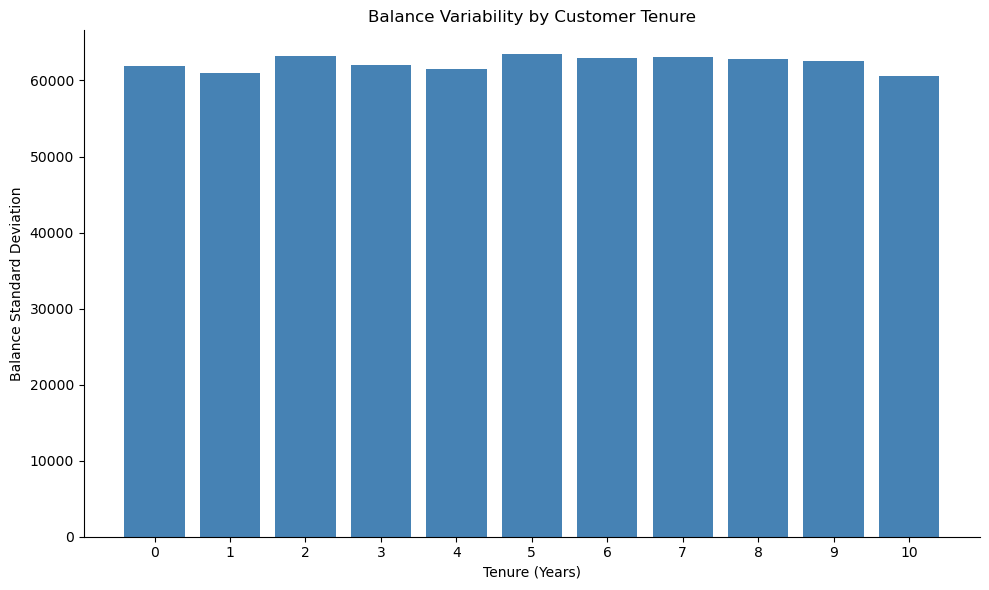

In [1193]:
# Do customers with longer account history show more stable financial behavior (e.g., consistent balances)

balance_stability = comb_df.groupby('Tenure')['Balance'].std()

plt.figure(figsize=(10,6))
plt.bar(balance_stability.index, balance_stability.values, color='steelblue')

plt.title('Balance Variability by Customer Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Balance Standard Deviation')
plt.xticks(balance_stability.index)
sb.despine()
plt.tight_layout()
plt.show()

In [1043]:
print(balance_stability)

Tenure
0     61838.266398
1     61038.076556
2     63168.430504
3     62014.676846
4     61570.493599
5     63420.351899
6     62925.009660
7     63123.576714
8     62885.490369
9     62540.751698
10    60633.008209
Name: Balance, dtype: float64


Tenure
0     1.443099
1     1.489855
2     1.590258
3     1.533730
4     1.516684
5     1.554348
6     1.519669
7     1.530156
8     1.522927
9     1.535569
10    1.559184
Name: Number of Products, dtype: float64


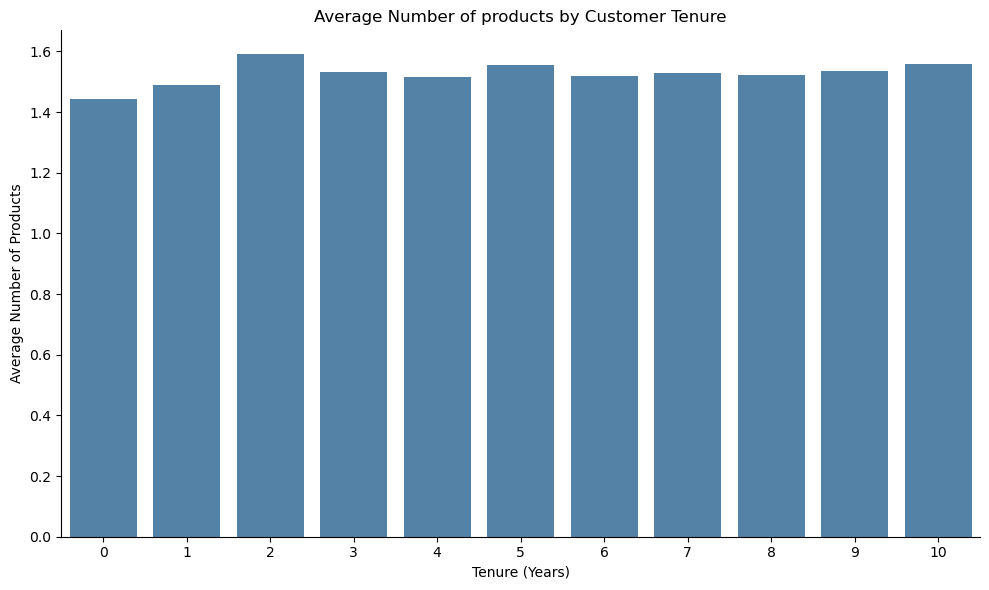

In [1200]:
# Is there a relationship between the number of products used and tenure length?

products_by_tenure = comb_df.groupby('Tenure')['Number of Products'].mean()
print(products_by_tenure)

plt.figure(figsize=(10, 6))
sb.barplot(x=products_by_tenure.index, y=products_by_tenure.values, color='steelblue')
plt.title('Average Number of products by Customer Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Number of Products')

plt.xticks(np.arange(min(products_by_tenure.index), max(products_by_tenure.index)+1, 1))
sb.despine()
plt.tight_layout()
plt.show()

    Tenure       Balance
0        0  79878.910630
1        1  78555.384222
2        2  76913.016753
3        3  77604.883919
4        4  74059.394065
5        5  76444.280860
6        6  74356.541522
7        7  75551.634426
8        8  77936.598254
9        9  76562.544014
10      10  73927.504000


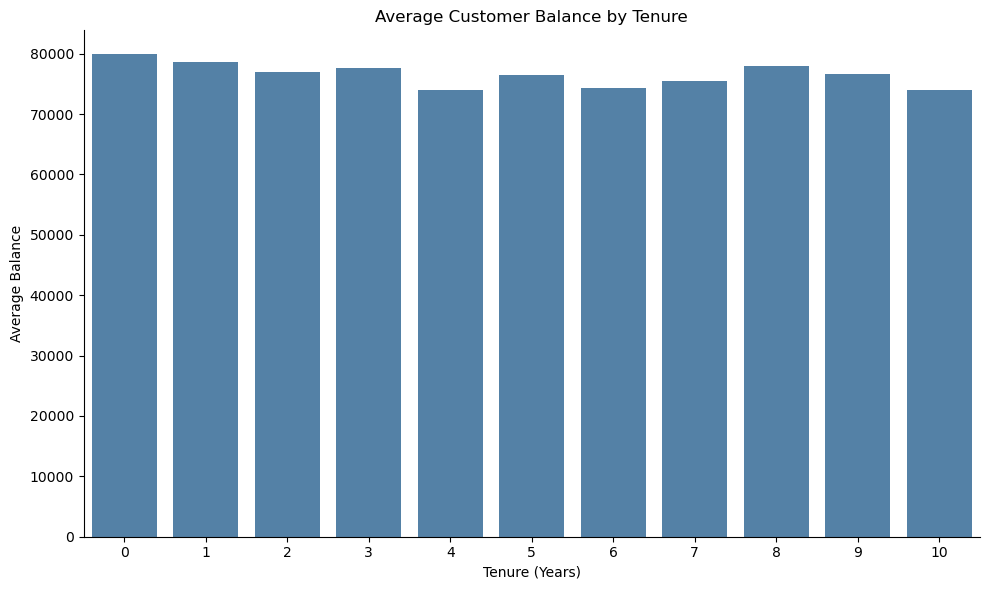

In [1185]:
tenure_balance = comb_df.groupby('Tenure')['Balance'].mean().reset_index()
print(tenure_balance)

plt.figure(figsize=(10, 6))
sb.barplot(x='Tenure', y='Balance', data=tenure_balance, color='steelblue')
plt.title('Average Customer Balance by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Balance')

plt.xticks(np.arange(tenure_balance['Tenure'].min(), tenure_balance['Tenure'].max() +1, 1))

sb.despine()
plt.tight_layout()
plt.show()

In [1100]:
# KPI Metrics

total_customers = comb_df.shape[0]
print(f'The total number of Bank customers is {total_customers}')

The total number of Bank customers is 9997


In [1087]:
# KPI Metrics

gender_counts = comb_df['Gender'].value_counts()
print(gender_counts)

Gender
Male      5456
Female    4541
Name: count, dtype: int64


In [1096]:
# KPI Metrics

retained_customers = comb_df[comb_df['Churned'] == 'No'].shape[0]
print(retained_customers) 


7960


In [1060]:
# KPI Metrics

churn_rate = (churned_customers/total_customers) * 100
print(churn_rate)


20.376112833850154


In [1067]:
# KPI Metrics

active_counts = comb_df['Customer Status'].value_counts()
print(active_counts)

Customer Status
Active      5149
Inactive    4848
Name: count, dtype: int64


In [1068]:
# KPI Metrics
active_churn = comb_df.groupby('Customer Status')['Churned'].value_counts(normalize=True).unstack()['Yes'] * 100
print(active_churn)

Customer Status
Active      14.274616
Inactive    26.856436
Name: Yes, dtype: float64


In [1072]:
# KPI Metrics
avg_balance = comb_df['Balance'].mean()
print(avg_balance)

76482.67980694208


In [1073]:
avg_tenure = comb_df['Tenure'].mean()
print(avg_tenure)

5.013203961188356


In [1076]:
# KPI Metrics

avg_products = comb_df['Number of Products'].mean()
print(avg_products)

1.5303591077323198


In [1069]:
# KPI Metrics

avg_credit_churned = comb_df[comb_df['Churned'] == 'Yes']['Credit Score'].mean()
print(avg_credit_churned)

645.3514972999509


In [1077]:
# KPI Metrics
#Average Tenure of Churned vs Retained

comb_df.groupby('Churned')['Tenure'].mean()

Churned
No     5.033794
Yes    4.932744
Name: Tenure, dtype: float64

In [1081]:
# KPI Metrics

gender_counts = comb_df['Gender'].value_counts()
print(gender_counts)

Gender
Male      5456
Female    4541
Name: count, dtype: int64


In [1107]:
Kpi_summary = {
    'Total Customers' : comb_df.shape[0],
    'Male Customers' : gender_counts.get('Male', 0),
    'Female Customers' : gender_counts.get('Female', 0),
    'Churned Cuatomers' : comb_df[comb_df['Churned'] == 'Yes'].shape[0],
    'Churn Rate (%)' : round(comb_df[comb_df['Churned'] == 'Yes'].shape[0] / comb_df.shape[0] * 100, 2),
    'Avg Credit Score' : round(comb_df['Credit Score'].mean(), 2),
    'Avg Balance': round(comb_df['Balance'].mean(), 2),
    'Avg products' : round(comb_df['Number of Products'].mean(), 2),
    'Avg Tenure' : round(comb_df['Tenure'].mean(), 2)
}
'Active customers' : round(comb_df[comb_df['Customer Satus'] == 'Active'].shape[0],
'Inactive customers' : round(comb_df[comb_df['Customer Satus'] == 'Inactive'].shape[0],
'Total Active Females' : round(comb_df[comb_df['Cus'] == 'Active'].shape[0],
'Total Active males' :

In [1110]:
Kpi_summary

{'Total Customers': 9997,
 'Male Customers': 5456,
 'Female Customers': 4541,
 'Churned Cuatomers': 2037,
 'Churn Rate (%)': 20.38,
 'Avg Credit Score': 650.55,
 'Avg Balance': 76482.68,
 'Avg products': 1.53,
 'Avg Tenure': 5.01}

In [1089]:
customer_data_dict

,Field,Description
0,CustomerId,A unique identifier for each customer
1,Surname,The customer's last name
2,CreditScore,A numerical value representing the customer's ...
3,Geography,The country where the customer resides (France...
4,Gender,The customer's gender (Male or Female)
5,Age,The customer's age
6,Tenure,The number of years the customer has been with...
7,Balance,The customer's account balance
8,NumOfProducts,The number of bank products the customer uses ...
9,HasCrCard,Whether the customer has a credit card (1 = ye...


In [1209]:
comb_df.groupby('Gender')['Tenure'].mean()

Gender
Female    4.967188
Male      5.051503
Name: Tenure, dtype: float64

In [1210]:
comb_df.groupby('Gender')['Number of Products'].mean()

Gender
Female    1.544373
Male      1.518695
Name: Number of Products, dtype: float64

In [1211]:
comb_df.groupby(['Gender', 'Churned'])['Number of Products'].mean()

Gender  Churned
Female  No         1.555556
        Yes        1.510975
Male    No         1.536200
        Yes        1.429844
Name: Number of Products, dtype: float64

In [1212]:
credit_by_status = comb_df.groupby('Customer Status')['Credit Score'].mean()
print(credit_by_status)

Customer Status
Active      652.971839
Inactive    647.968234
Name: Credit Score, dtype: float64


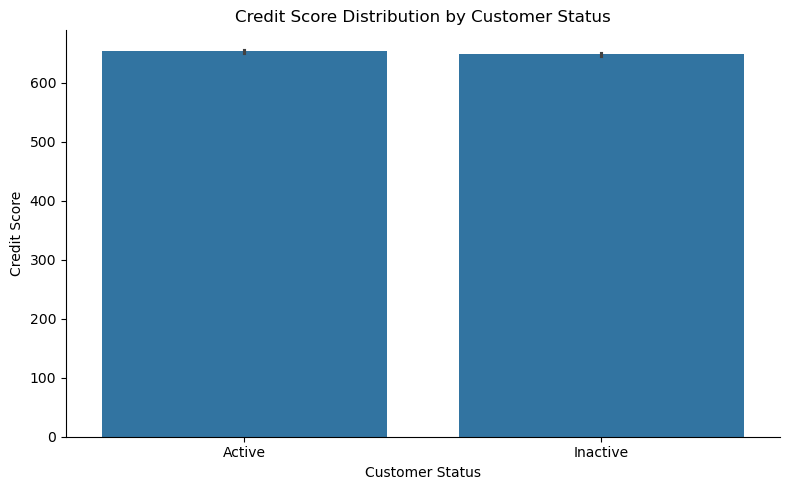

In [1215]:
plt.figure(figsize=(8, 5))
sb.barplot(data=comb_df, x='Customer Status', y='Credit Score')
plt.title('Credit Score Distribution by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Credit Score')
plt.tight_layout()
sb.despine()
plt.tight_layout()
plt.show()

Country
Germany    651.484450
Spain      651.324717
France     649.690604
Name: Credit Score, dtype: float64


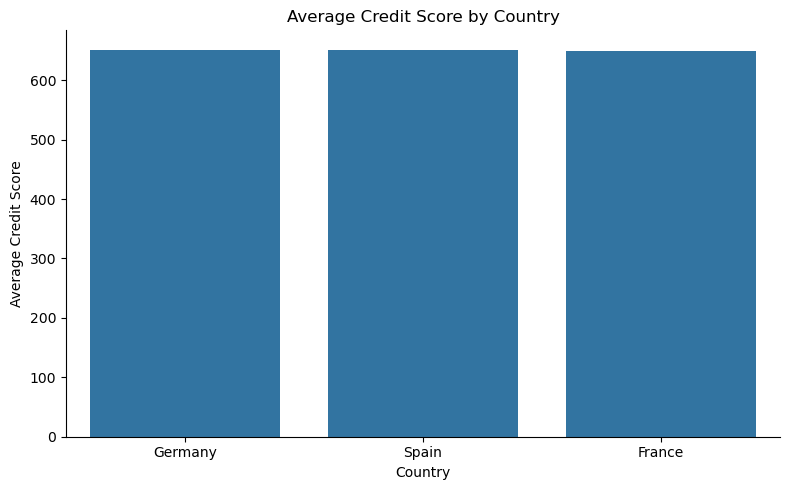

In [1217]:
# average credit score by country

credit_by_country = comb_df.groupby('Country')['Credit Score'].mean().sort_values(ascending=False)
print(credit_by_country)

plt.figure(figsize=(8, 5))
sb.barplot(x=credit_by_country.index, y=credit_by_country.values)
plt.title('Average Credit Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Credit Score')
plt.tight_layout()
sb.despine()
plt.tight_layout()
plt.show()


In [1218]:
customer_status_counts = comb_df['Customer Status'].value_counts()
print(customer_status_counts)

Customer Status
Active      5149
Inactive    4848
Name: count, dtype: int64
